# 2章 教師あり学習

##### 一般に教師あり学習を行うには訓練セットを作るために人手が必要となるが，ひとたび学習が終われば，非常に人手がかかるタスクを高速化したり，不可能なタスクを可能にすることができる．

## 2.1 クラス分類と回帰

##### クラス分類問題と回帰問題を区別するには，出力に何らかの連続性があるかを考えてみればよい．

## 2.2 汎化，過剰適合，適合不足

### 2.2.1 モデルの複雑さとデータセットの大きさ

モデルの複雑さは訓練データセットが持つ入力のバリエーションに密接に結びついている．

##### 教師あり学習タスクにおいては，より多くのデータを用い，適度に複雑なモデルを用いると驚くほどうまくいくことがある．

## 2.3 教師あり機械学習アルゴリズム

##### 最も一般的な機械学習アルゴリズムについて，どのようにデータから学習し，どのように予測を行うのかを見ていく．機械学習アルゴリズムのリファレンスガイドとなる章．

### 2.3.1 サンプルデータセット

Duplicate key in file WindowsPath('C:/Users/81804/anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family:  sans-serif')
C:\Users\81804\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Second feature')

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


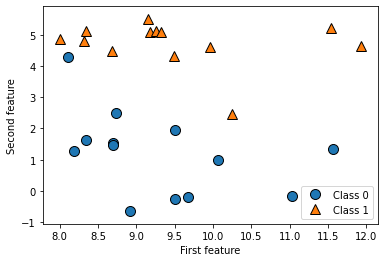

In [1]:
import mglearn
import matplotlib.pyplot as plt
# データセットの生成
X, y = mglearn.datasets.make_forge()
# データセットをプロット
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

Text(0, 0.5, 'Target')

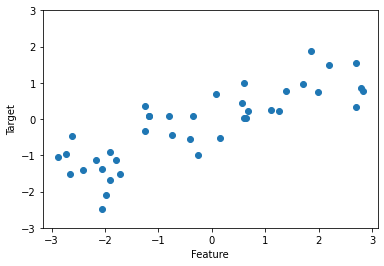

In [2]:
# 回帰アルゴリズムで使用する，waveデータセット
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

##### 小さい合成データセットを補う

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(cancer.data.shape)

(569, 30)


In [5]:
import numpy as np
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [6]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
# boston_housing
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [8]:
X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

### 2.3.2 k-最近傍法

#### 2.3.2.1 k-最近傍法によるクラス分類

##### 1-最近傍法アルゴリズムの予測
近傍点のラベルが予測されたラベルになる．

##### kの場合
投票で決める．最も近いkのなかで最も多いクラスに分類する．

C:\Users\81804\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


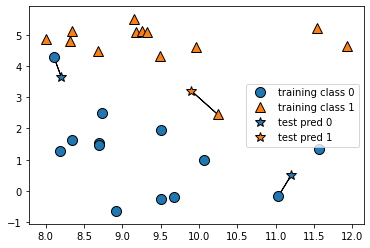

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\81804\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


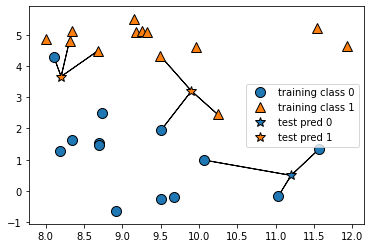

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

C:\Users\81804\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


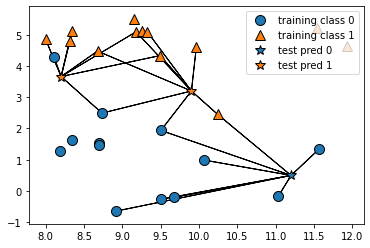

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=8)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# データセット格納と分割
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# インスタンス作成
clf = KNeighborsClassifier(n_neighbors=3)
# 訓練セットでクラス分類器を訓練する
clf.fit(X_train, y_train)
# predict
print("Test set predictions: {}".format(clf.predict(X_test)))
# score
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


C:\Users\81804\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


#### 2.3.2.2 KNeighborsClassifierの解析

##### 決定境界
アルゴリズムがクラス0に割り当てる場合と，クラス1に割り当てる場合の境目．最近傍点が少ない場合は複雑度の高いモデルに対応し，最近傍点が多い場合は複雑度の低いモデルに対応する．

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


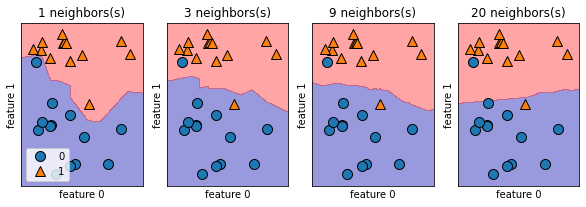

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
print(axes)

for n_neighbors, ax in zip([1, 3, 9, 20], axes):
    # fitメソッドは自分自身を返すので，1行でインスタンスを生成してfitすることができる．
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

#### 2.3.2.3 k-近傍回帰

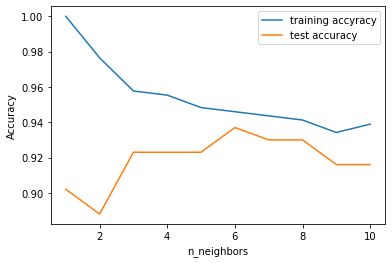

In [14]:
# モデルの複雑さと汎化性能の関係を確認する
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# n_neighborsを1-10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # モデルを構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 訓練セット精度を記録
    training_accuracy.append(clf.score(X_train, y_train))
    # 汎化性能を記録
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accyracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### 2.3.2.4 KNeighborsRegressorの解析

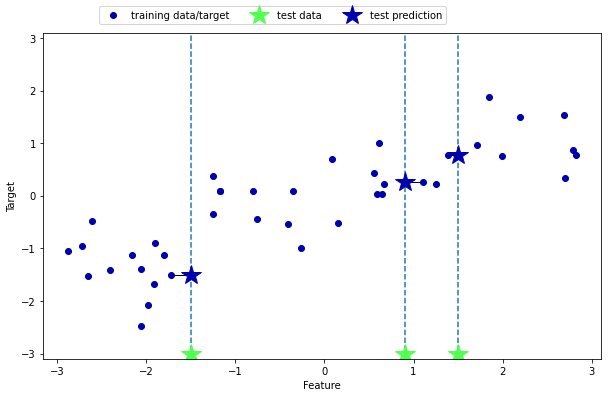

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

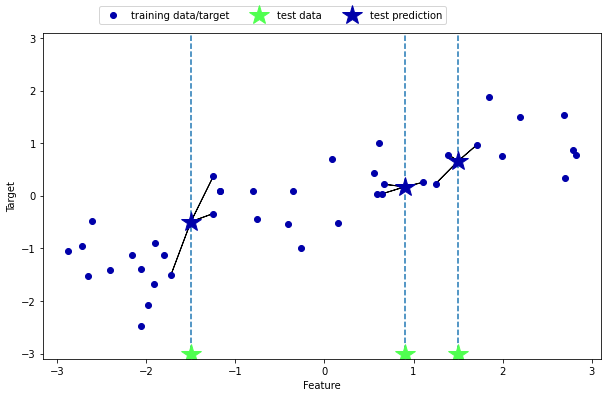

In [16]:
# k
mglearn.plots.plot_knn_regression(n_neighbors=3)

#### 2.3.2.5  利点と欠点とパラメータ

In [17]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# waveデータセットを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 3つの最近傍点を考慮するよう設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
# 訓練データと訓練ターゲットを用いてモデルを学習させる
reg.fit(X_train, y_train)

print("Test set predictions:\n{}".format(reg.predict(X_test)))

print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


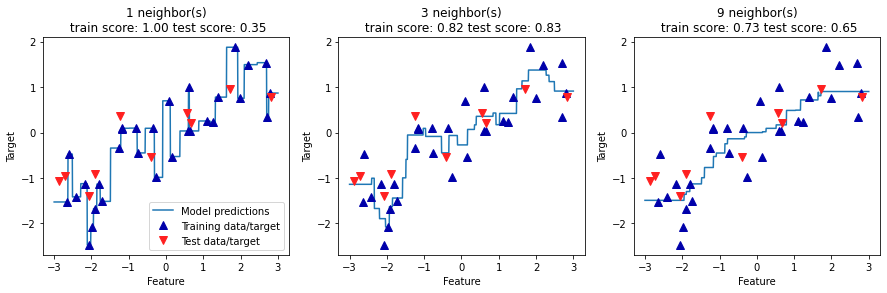

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3から3までの間に1,000点のデータポイントを作る
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

### 2.3.3 線形モデル

##### 線形関数
線形モデルの入力特徴量

#### 2.3.3.1 線形モデルによる回帰

w[0]: 0.393906  b: -0.031804


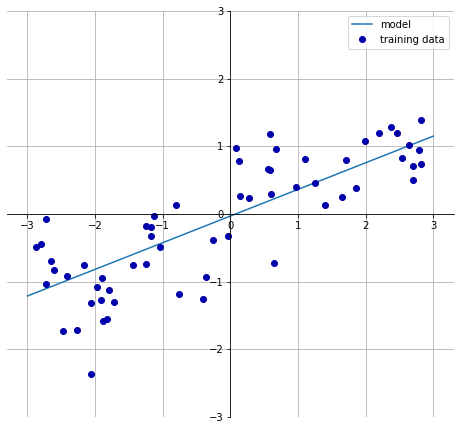

In [19]:
mglearn.plots.plot_linear_regression_wave()

#### 2.3.3.2 線形回帰（通常最小二乗法）

##### 通常最小二乗法（ordinary least squares:OLS）
最も単純で，最も古典的な線形回帰手法．予測と真の回帰ターゲットyとの平均二乗誤差(mean squared error)が最小になるようにパラメータw,bを求める．

In [20]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_:[0.39390555]
lr.intercept_:-0.031804343026759746


In [21]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [22]:
# 特徴量が多く過剰適合を起こしそうなデータセットで線形モデルを実装する
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


#### 2.3.3.3 リッジ回帰

##### リッジ回帰の特徴
係数を，訓練データに対する予測だけではなく，他の制約に対しても最適化する．例えば係数の絶対値の大きさを可能な限り小さくする．つまり傾きを小さくしたい．直観的には，予測をうまく行いつつ，個々の特徴量が出力に与える影響を小さくしたい．

##### 正則化（regularization）
過剰適合を防ぐために明示的にモデルを制約すること．上記で記した内容も正則化にあたる．

In [23]:
# リッジ回帰を実装
# データセットの変数は上記コードでメモリ上に維持したまま
from sklearn.linear_model import Ridge
# モデルの学習
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [24]:
# alphaパラメータをいじってみる
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_test, y_test)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))
ridge_self = Ridge(alpha=0.06).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge_self.score(X_test, y_test)))
print("Test set score: {:.2f}".format(ridge_self.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64
Training set score: 0.77
Test set score: 0.77
Training set score: 0.77
Test set score: 0.77


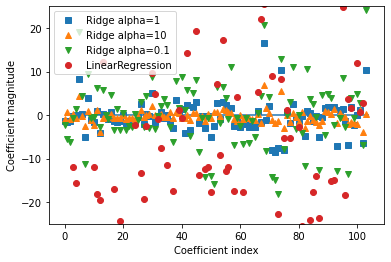

In [25]:
# alphaとcoef_の関係図示
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


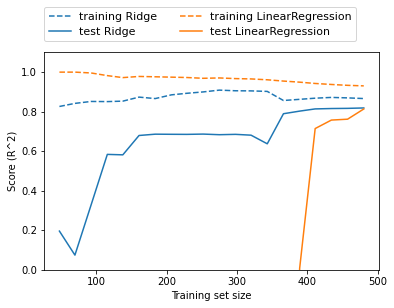

In [26]:
mglearn.plots.plot_ridge_n_samples()

#### 2.3.3.4 Lasso

###### いくつかの特徴量が無視される．
いくつかの係数が0になると，モデルを解釈しやすくなり，どの特徴量が重要なのかが明らかになる．
##### L1正則化
係数ベクトルのL1ノルム，すなわち係数の絶対値の和にペナルティを与える．

In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_!=0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [28]:
# max_iterの値を増やしておく
# こうしておかないとモデルが，max_iterを増やすように警告を発する
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [29]:
# alphaを小さくすると，過剰適合で起き，LinearRegressionと似たようなスコアになる．
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

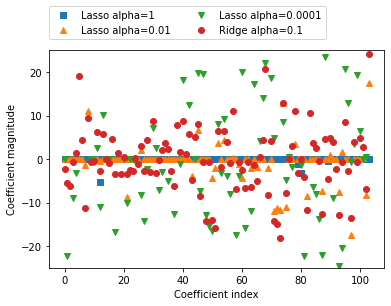

In [30]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

#### 2.3.3.5 クラス分類のための線形モデル

##### 数式
### $$
 \hat{y} = w[0]×x[1]+w[1]×x[1]+…+w[p]×x[p]+b>0
$$

##### 最も一般的なクラス分類アルゴリズム
###### ロジスティック回帰（logistic regression）
###### 線形サポートベクターマシン（linear support vector machines: SVM）

C:\Users\81804\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\81804\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


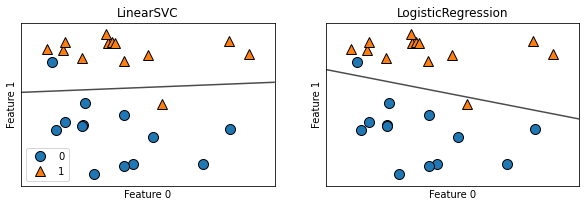

In [31]:
# forgeデータセットで決定境界を可視化する
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In [32]:
# LogisticRegressionをcancerデータセットを用いて詳しく解析する．
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.965


C:\Users\81804\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.958


C:\Users\81804\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.937
Test set score: 0.930


C:\Users\81804\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


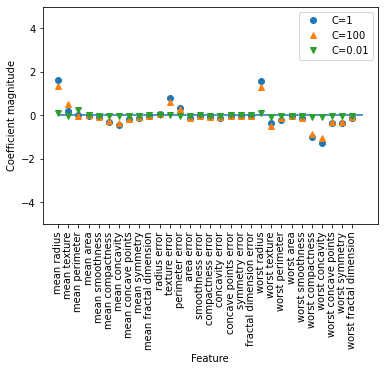

In [35]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92


C:\Users\81804\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


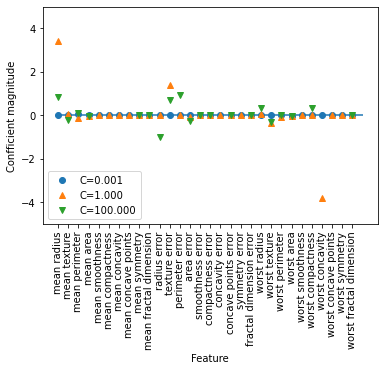

In [36]:
# L1正則化を行ったときの分類精度をプロット
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Confficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

#### 2.3.3.6 線形モデルによる多クラス分類

##### 1対その他アプローチの数式
### $$
w[0]×x[0]+w[1]×x[1]+…+w[p]×x[p]+b
$$

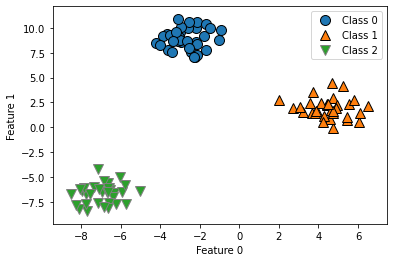

In [37]:
# 各クラスをガウス分布でサンプリングした2次元データセット
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [38]:
# LinearSVCクラス分類器をこのデータセットで学習させる
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape) # 係数配列の形状
print("Intercept shape: ", linear_svm.intercept_.shape) # 切片配列の形状

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


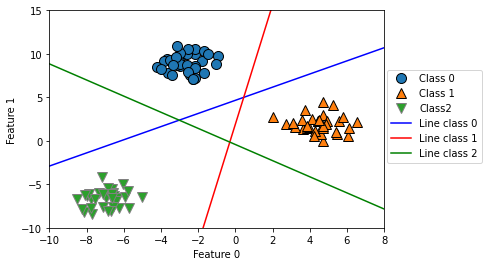

In [39]:
# 3つのクラス分類器による直線を可視化する
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', "Class 1", "Class2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))

#### 2.3.3.7 利点，欠点，パラメータ

##### 線形モデルの主要なパラメータ
- 回帰モデル：alpha
- LinearSVC,LogisticRegression：C

##### L1正則化を行うと．．．
少数の特徴量しか使わないので，どの特徴量がそのモデルにとって重要なのか，その特徴量がどのような効果を持つのかを説明しやすい．

##### 線形予測の利点とジレンマ
利点としては，予測手法が比較的理解しやすいということ．回帰予測や分類予測は先に示した式で導かれる．一方係数がどうしてその値になっているのかは，明らかではない．特にデータセットの中において，強く相関した特徴量がある場合はわかりにくい．

##### コードを簡潔にする，メソッドチェーンの話
scikit-learnモデルのfitメソッドがselfを返し，訓練済みモデルに割り当てる．scikit-learnではfitとpredictに対してメソッドチェーンがよく使われる．

##### 簡潔にすればいいって話でもない．．
モデルのインスタンス生成と訓練と予測を1行で書くこともできるが，コードの読みにくさを招くリスクや，モデルがどこにも格納されずそれを使った別のデータ予測ができないことになる．

## 2.4 クラス分類器の不確実性推定

### 2.3.4 ナイーブベイズクラス分類器

##### 特徴と代償
そもそもナイーブベイズ分類器は，線形モデルによく似たクラス分類器の一族である．訓練が線形モデルよりも高速だが，汎化性能は，LogisticRegression, LinearSVCよりもわずかに劣るケースが多い．

##### scikit-learnに実装される3種のナイーブベイズクラス分類器
- GaussianNB：任意の連続データに適用可能
- BernoulliNB：2値データを仮定．ほとんどの場合データのクラス分類に用いられる．
- MultinomialNB：カウントデータを仮定．ほとんどの場合データのクラス分類に用いられる.

In [40]:
# BernoulliNBは個々のクラスに対して，特徴量ごとに非ゼロである場合をカウントする．
X = np.array([[0, 1, 0, 1],
             [1, 0, 1, 1],
             [0, 0, 0, 1],
             [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

# クラスごとに非ゼロの要素をカウントするには以下のコードで
counts = {}
for label in np.unique(y):
    # クラスに対してループ
    # それぞれの特徴量ごとに非ゼロの数を（加算で）数える
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts: \n{}".format(counts))

Feature counts: 
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


#### 2.3.4.1 利点，欠点，パラメータ

##### MultinomialNB, BernoulliNBのパラメータはalpha
アルゴリズムは，すべての特徴量に対してalphaの大きさに応じた量だけ追加されたかのようにふるまう．alphaが大きくなるとスムーズになりモデルの複雑さは減少する．アルゴリズムの性能はalphaに対して頑健だが，多くの場合にこの値を調整することで精度の向上がいくらか期待できる．

##### データに適した3つの分類器を使う．
GaussianNBは多くの場合に，高次元データに対して用いられる．他の2つはテキストのような疎なカウントデータに対して用いられる．一般的にはMultinomialNBの方がBernoulliNBよりも若干性能が良いが，とりわけ比較的多数の非ゼロ特徴量がある場合はMultinomialNBが有効．

##### ナイーブベイズを使っていこう
線形モデルですら時間がかかりすぎるような大規模なデータセットに対するベースラインモデルとして非常に有用である．

### 2.3.5 決定木

##### 決定木
クラス分類と回帰タスクに広く用いられているモデルである．決定木ではYes/Noで答えられる質問で構成された階層的な木構造を学習する．

#### 2.3.5.1 決定木の構築

##### 決定木の学習
正解に最も早くたどり着けるような一連のYes/No型の質問の学習を意味する．データの再帰分割は，対象の領域（決定木の葉）に1つの対象地（1クラス，もしくは1つの回帰値）しか含まれなくなるまで繰り返される．

#### 2.3.5.2 決定木の複雑さの制御

- pre-prunning:構築過程で木の生成を早めに止める
- post-prunning:一度木を構築してから，情報の少ないノードを削除する．

scikit-learnには事前枝刈りしか実装されていない．

In [41]:
# 何もしない場合と，事前枝刈りを実装した精度を確認する．
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [42]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


#### 2.3.5.3 決定木の解析

## 決定機のグラフがうまく出せない。graphviz

#### 2.3.5.4 決定木の特徴量の重要性

##### 特徴量の重要度（feature importance）
決定木が行う判断にとって，個々の特徴量がどの程度重要かを示す割合．それぞれの特徴量に対する0と1の間の数で，0は「全く使われていない」，1は「完全にターゲットを予想できる」と意味する．特徴量の重要度の和は常に1になる．

In [43]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], 
               feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [44]:
print("Feature importtances:\n{}".format(tree.feature_importances_))

Feature importtances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


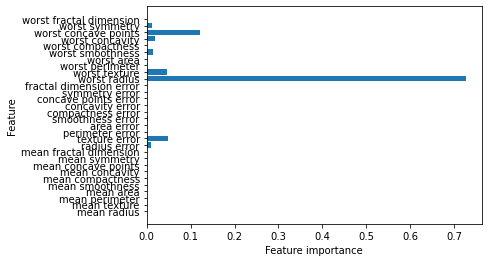

In [45]:
# 特徴量の重要度を可視化する
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

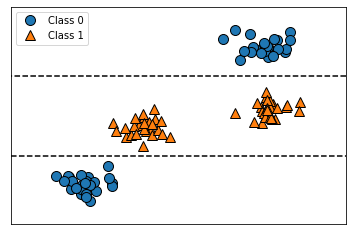

In [46]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

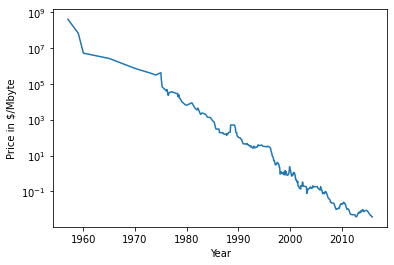

In [47]:
import os
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,
                                     "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [48]:
from sklearn.tree import DecisionTreeRegressor
# 過去のデータを用いて2000年以降の価格を予想する
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 日付に基づいて価格を予測
X_train = data_train.date[:, np.newaxis]
# データとターゲットの関係を単純にするため対数変換
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# すべての価格を予想
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 対数変換をキャンセルするために逆変換
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

C:\Users\81804\AppData\Local\Temp/ipykernel_24288/577251074.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
C:\Users\81804\AppData\Local\Temp/ipykernel_24288/577251074.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


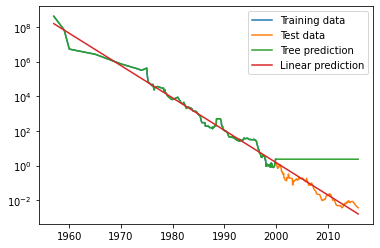

In [49]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

#### 2.3.5.5 長所，短所，パラメータ

##### 2つの長所
- 結果のモデルが容易に可視化可能で，専門家でなくても理解可能であること．
- データのスケールに対して完全に不変であること．

##### 最大の問題点
事前枝刈りを行ったとしても，過剰適合しやすく，汎化性能が低い．

ほとんどのアプリケーションにおいては，決定木を単体で使わずにアンサンブル法を用いる．

### 2.3.6 決定木のアンサンブル法

##### アンサンブル法（Enasmbles）
複数の機械学習モデルを組み合わせることで，より強力なモデルを構築する手法．
##### 様々なデータセットに対するクラス分類や回帰に関して有効であることがわかっているアンサンブル法
- ランダムフォレスト
- 勾配ブースティング決定木

#### 2.3.6.1 ランダムフォレスト

##### ランダムフォレストの概要
個々の決定木は比較的うまく予測ができていて，一部のデータに対して過剰適合してしまう修正を利用する．それぞれ異なった方向に過剰適合した決定木をたくさん作れば，その結果の平均をとることで過剰適合の度合いを減らすことができるのではないか．

##### ランダムフォレストたる所以
個々の決定木が互いに異なるように，決定木の構築過程で乱数を導入する．

##### ランダムフォレストに乱数を導入する2つの方法
- 決定木を作るためのデータポイントを選択する方法
- 分岐テストに用いる特徴を選択する方法

##### ランダムフォレストの構築
まずは構築する決定木の数を決める．

##### ブートストラップサンプリング（bootstrap sample）
n_samples個のデータポイントから，交換ありでデータポイントをn_sample回選び出す方法．

→もとのデータセットと同じ大きさだが，データの一部（だいたい3分の1）が欠け，一部がなんどか現れているデータセットが得られる．

##### 決定木を作るアルゴリズムをいじる
個々のノードで最適なテストを選ばない．代わりに特徴量のサブセットをランダムに選択し，その特徴量を使うものの中から最適なテストを選ぶ．→決定木の個々のノードは，異なる特徴量のサブセットを使って決定を行うことになる．

##### max_features
1にすれば，分岐時に使う特徴量選択には全く選択肢がないことになり，ランダムに選ばれたある特徴量に対してスレッショルドを探すだけになる．大きくすれば，ランダムフォレストの決定木が似たようなものになり，最も識別性の高い特徴量を使うので，訓練データに容易に適合可能．小さくすれば，ランダムフォレストの中の決定木は相互に大幅に異なり，各決定木をかなり深く作らなければデータに適合しない．

##### 予測の出力
- 回帰：平均値
- クラス分類：ソフト投票戦略

##### ランダムフォレストの解析
ランダムフォレストをtwo_moonsデータセットに適用する

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [51]:
forest.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710)]

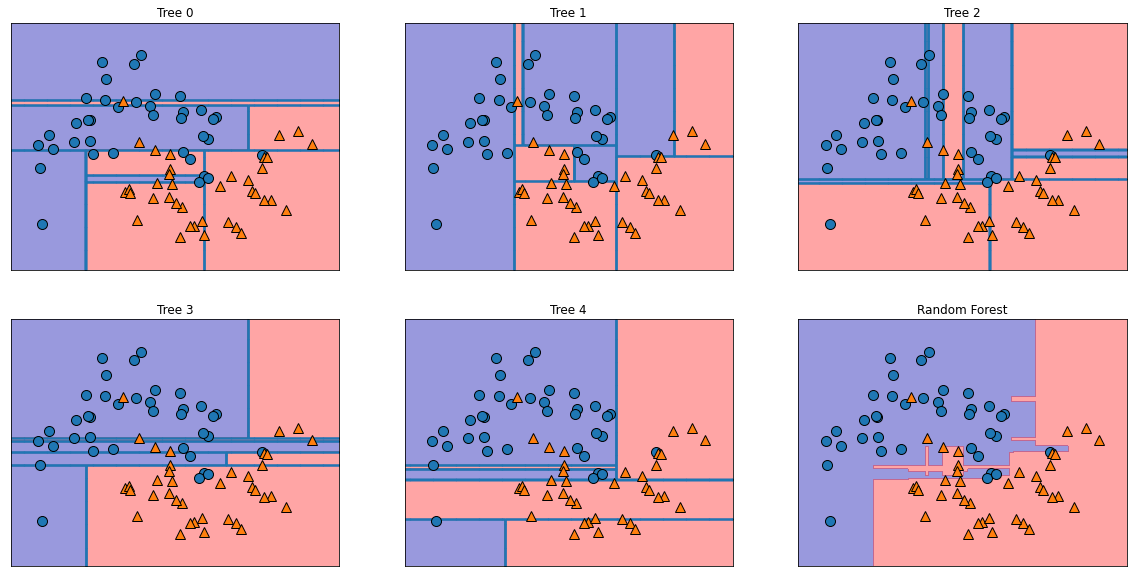

In [52]:
# それぞれの決定木で学習された決定木と，ランダムフォレストによって行われる集合的な予測を可視化する
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

5つの決定木が学習した決定境界は明らかに相互に異なることがわかる．それぞれの決定木は，一部の転について分類に失敗しているが，これはブートストラップサンプリングの結果である．

ランダムフォレストは個々のどの決定木よりも過剰適合が少なく，直観に合致した決定境界を描く．実際のアプリケーションに対してはもっと多くの決定木を使うので，決定境界はさらになめらかになる．

In [53]:
# 100個の決定木を用いたランダムフォレスト
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


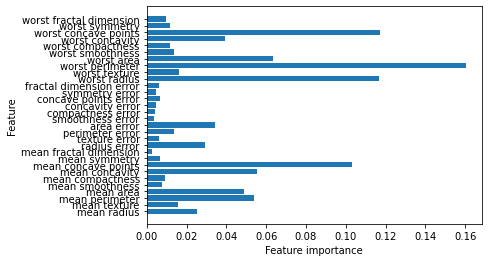

In [54]:
# ランダムフォレストによる特徴量の重要度を確認する．
plot_feature_importances_cancer(forest)

##### 長所，短所，パラメータ
回帰でもクラス分類でも，ランダムフォレストが現在最も広く使われている機械学習手法である．非常に強力であり，多くの場合それほどパラメータをチューニングせずに使うことができ，データのスケール変換をする必要もない．

#### 2.3.6.2 勾配ブースティング回帰木（勾配ブースティングマシン）

複数の決定木を組み合わせてより強力なモデルを構築するもう一つのアンサンブル手法である．名前に回帰とついているが，回帰にもクラス分類にも利用可能．

##### ランダムフォレストとは対照的に．．．
1つ前の決定木の誤りを次の決定木が修正するようにして，決定木を順番に作っていく．

##### 強力な事前枝刈り
デフォルトでは，勾配ブースティング回帰木に乱数性はない．勾配ブースティング回帰木では深さ1～5程度の非常に浅い決定木が用いられる．これでモデルの占めるメモリが小さくなり，予測速度が向上する．

##### 弱学習機（weak learner）
勾配ブースティング回帰木では浅い木それぞれはデータの一部に対してのみ正確な予測を行うので，決定木を繰り返し追加して性能を向上させる．

##### 立派なアルゴリズム
機械学習のコンペではしばしば優勝するし，産業界にも進出する優れもの．ランダムフォレストに比べるとパラメータ設定の影響を受けやすいが，正しくパラメータを設定できれば，ランダムフォレスト以上の性能を持つ．

##### おなじみlearning_rate
個々の決定木がそれまでの決定木の過ちをどれくらい強く補正しようとするかを制御する．学習率を大きく設定すれば，個々の決定木が強く補正を行おうとしてモデルが複雑化する．n_estimatorsを増やす，つまり決定木の数を増やしても訓練セットに対する過ちを補正する機会の増加によって同じくモデルは複雑化する．

In [55]:
# GradientBoostingClassifier by cancer learning_rate=0.1, n_estimators=100  this example is default
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


##### おそらく過剰適合なので．．．
- 深さの最大値を制限して強力な事前枝刈りを行う
- 学習率を下げる

といった諸々の対策を行う．

In [56]:
# max_depth=1
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

# learning_rate=0.01
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972
Accuracy on training set: 0.988
Accuracy on test set: 0.965


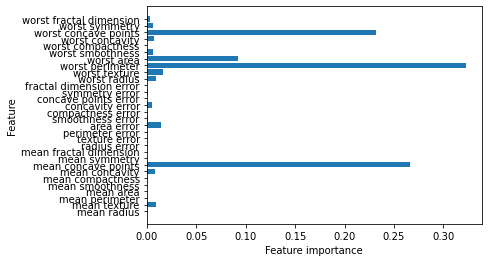

In [57]:
# 特徴量の重要度を可視化
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

##### 使用時の留意点的な
勾配ブースティングとランダムフォレストは，同じようなデータを得意とするので，一般的にはランダムフォレストを先に試した方がいい．ランダムフォレストの方が頑健だから．ランダムフォレストがうまくいったとしても，予測時間が非常に重要な場合や，機械学習モデルからよりより精度を期待したい，という場合は，勾配ブースティングを試すべきだろう．

##### 規模を大きく，勾配ブースティングをもっと．
xgboostパッケージと，そのPythonインターフェイスを理解できればscikit-learnよりも高速でチューニングの容易な勾配ブースティングを利用できる．

##### 長所，短所．パラメータ
勾配ブースティング回帰木は，教師あり学習の中において最も強力かつ広く使われているモデルである．
##### 短所
パラメータのチューニングに細心の注意が必要であること．訓練にかかる時間が長いこと．そしてやはり高次元の疎なデータに対してはあまりうまく機能しない．
##### よく見られるチューニングパターン
n_estimatorsを大きくして複雑なモデルを許容するのは過学習の原因になるのであまり得策でない．n_estimatorsは時間とメモリ量で決めておき，learning_rateに対して探索を行う．max_depthは小さめに．

### 2.3.7 カーネル法を用いたサポートベクタマシン

##### カーネル法を用いたサポートベクタマシン（SVM）
入力空間の超平面のような簡単なモデルではなく，より複雑なモデルを可能にするために線形サポートベクタマシンを拡張したもの．サポートベクタマシンはクラス分類にも回帰にも利用可能．

#### 2.3.7.1 線形モデルと非線形特徴量

##### 線形モデルを柔軟に
特徴量の追加が必要．具体的には入力特徴量の交互作用（積）の追加や多項式項を追加するなど．

Text(0, 0.5, 'Feature 1')

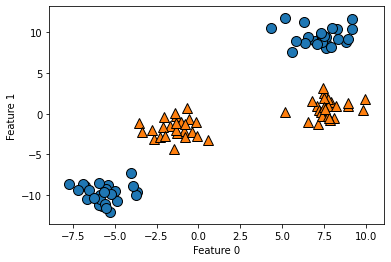

In [58]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

当然，上記のデータを直線で分類することは不可能．

C:\Users\81804\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'Feature 1')

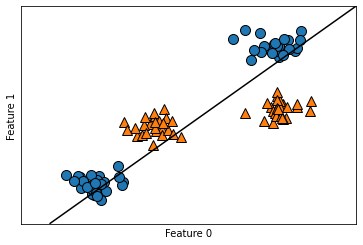

In [59]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

C:\Users\81804\AppData\Local\Temp/ipykernel_24288/1298533009.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature1**2')

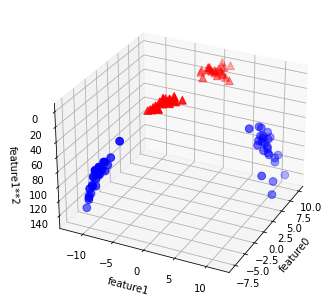

In [60]:
# 2番目の特徴量の2乗を追加
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

# 3D可視化
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 の点をプロットしてからy == 1 の点をプロット
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1**2")

C:\Users\81804\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\81804\AppData\Local\Temp/ipykernel_24288/3258339189.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature1**2')

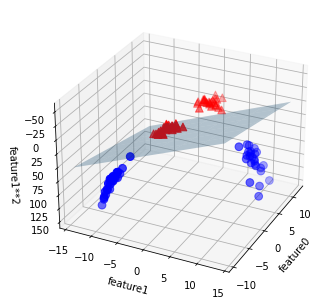

In [61]:
# 拡張されたデータセットに対して線形モデルを適用してみる
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 線形決定境界を描画
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() -2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1**2")

元の特徴量の関数としてみると，線形SVMモデルは線形ではなくなっている．

Text(0, 0.5, 'Feature 1')

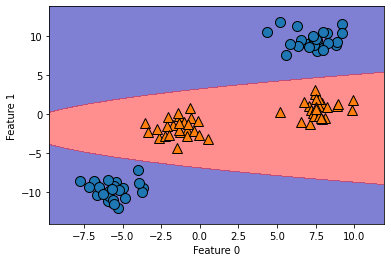

In [62]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 2.3.7.2 カーネルトリック

##### 概要
非常に大きく成りうる表現を実際に計算せずに，高次元空間のクラス分類器を学習させる巧妙なトリック．拡張された特徴表現上でのデータポイント間の距離を，実際にデータポイントの拡張を計算せずに，直接計算する方法．

##### サポートベクタマシンで広く用いられている高次元空間へのマップ方法
###### 多項式カーネル
もとの特徴量の特定の次数までのすべての多項式を計算
###### 放射基底関数カーネル（radial basis function: RBF）カーネル，ガウシアンカーネル
無限次元の特徴空間に対応し，説明困難．直観的にはガウシアンカーネルではすべての次数のすべての多項式を考えるが，次数が高くなるにつれてその特徴量の重要性を小さくしている．

#### 2.3.7.3 SVMを理解する

##### サポートベクタマシンという名の由来
訓練の過程で，SVMは個々のデータポイントが，2つのクラスの決定境界を表現するのにどの程度重要かを学習する．多くの場合，2つのクラスの境界に位置するごく一部の訓練データポイントだけが決定境界を決定する．そのデータポイントがサポートベクタと言われる．
##### 新しいデータポイントのクラス分類予測
サポートベクタとの距離と，訓練過程で学習された個々のサポートベクタの重要性によって決定される．
##### データポイント間の距離を測るガウシアンカーネルの数式
### $$
k_{rbf}(x_1, x_2) = exp(-\gamma||x_1-x_2||^2)
$$

Text(0, 0.5, 'Feature 1')

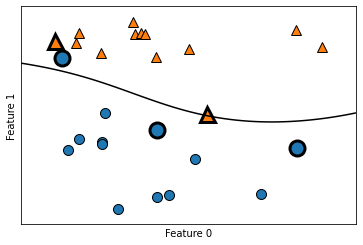

In [63]:
# forge dataset svm
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot sapport vector
sv = svm.support_vectors_
# サポートベクタのクラスラベルはdual_coef_の正負によって与えられる
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 2.3.7.4 SVMパラメータの調整

##### gammaとC
- gamma: 点が近いということを意味するスケールを決定する
- C: 線形モデルで用いたのと同様の正則化パラメータ．個々のデータポイントの重要度を制限．(dual_coef_)

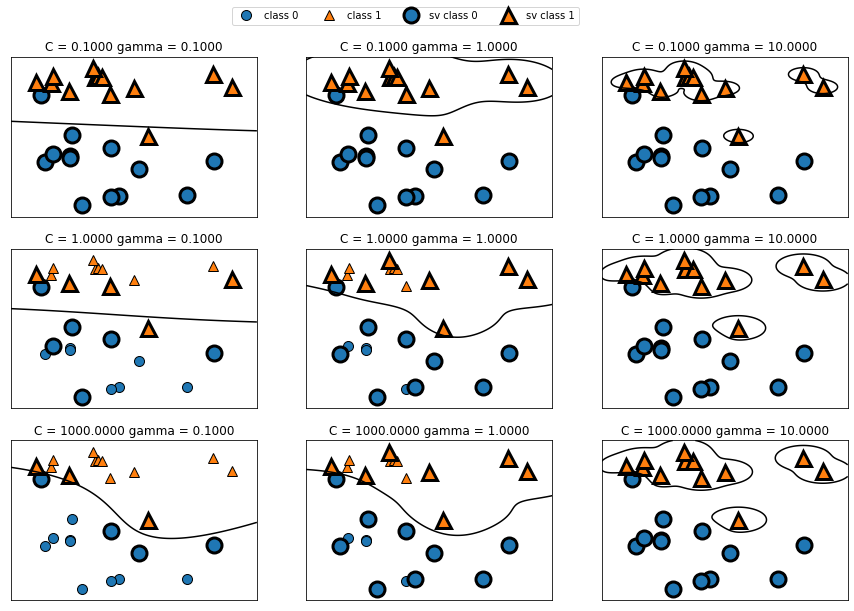

In [64]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2))

In [65]:
# RBF carnel svm cancer dataset
# C=1, gamma=1/n_features
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


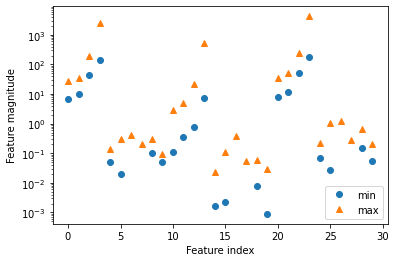

In [66]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

#### 2.3.7.5 SVMのためのデータの前処理

##### MinMaxScalerを手動で
カーネル法を用いたSVMではすべての特徴量を0～1の間になるようにスケール変換する方法がよくとられる．

In [67]:
# 訓練セットの特徴量ごとに最小値を計算
min_on_training = X_train.min(axis=0)
# 訓練セットの特徴量ごとにレンジ（最大値ー最小値）を計算
range_on_training = (X_train - min_on_training).max(axis=0)

# 最小値を引いてレンジで割る
# 個々の特徴量はmin=0, max=1となる
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=-0)))
print("Maximum for each feature\n{}".format(X_train_scaled.max(axis=-0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [68]:
# テストセットに訓練セット同様のスケーリング
X_test_scaled = (X_test - min_on_training) / range_on_training

In [69]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


In [70]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


#### 2.3.7.6 利点，欠点，パラメータ

カーネル法を用いたサポートベクタマシンは，さまざまなデータセットに対してうまく機能する強力なモデル．サンプル数をいたずらに増やすとうまく機能しない．

### 2.3.8 ニューラネットワーク（ディープラーニング）

ニューラルネットワークというアルゴリズムが、最近「ディープラーニング」という名前で再度注目を集めている。ディープラーニングアルゴリズムの多くは特定のアプリケーションに向けて注意深く作られたものである。多層パーセプトロンは、フィードフォワード・ニューラルネットワークもしくはただのニューラルネットワークと呼ばれる。

#### 2.3.8.1 ニューラルネットワークモデル

In [71]:
# 環境変数を編集しないと動かない
display(mglearn.plots.plot_logistic_regression_graph())

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [73]:
# 環境変数を編集しないと動かない
display(mglearn.plots.plot_single_hidden_layer_graph())

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

Text(0, 0.5, 'relu(x), tanh(x)')

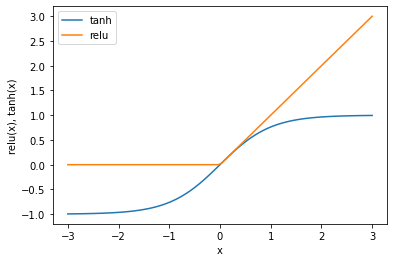

In [74]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

##### ハイパーパラメータ
隠れ層のノード数はユーザが設定するいわゆるハイパーパラメータである．小さくて単純なデータセットでは10ぐらいだが，非常に複雑なデータの場合その数は10,000にもなる．

##### ディープラーニング
計算層をたくさん持つ大きなニューラルネットこそその名の由来．

#### 2.3.8.2 ニューラルネットワークのチューニング

Text(0, 0.5, 'Feature 1')

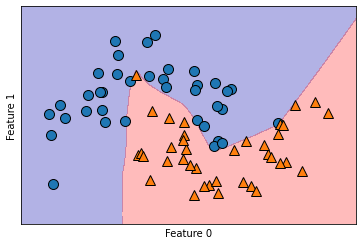

In [75]:
# MLPClassifier two_moons
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

決定境界を滑らかにするには
- 隠れ層のユニット数を増やす
- 隠れ層を増やす
- 非線形活性化関数にtanhを用いる

Text(0, 0.5, 'Feature 1')

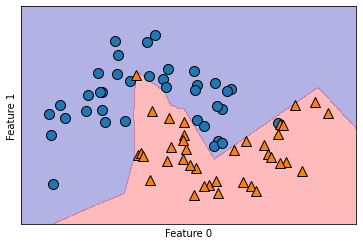

In [77]:
# それぞれ10ユニットの隠れ層を2層使う
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

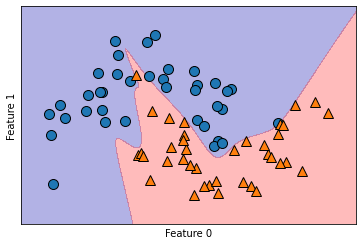

In [79]:
# それぞれ10ユニットの隠れ層を2層使い，非線形活性化関数にtanhを使う
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

さらにニューラルネットワークの複雑さを，リッジ回帰や線形クラス分類器で行ったのと同様にl2ペナルティで重みを0に近づけることで，制御可能．

##### alpha
MLPClassifierでのパラメータは線形回帰モデルと同様にalpha．デフォルトでは非常に小さい値を持ちつまり弱い正則化が設定されている．

C:\Users\81804\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\81804\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


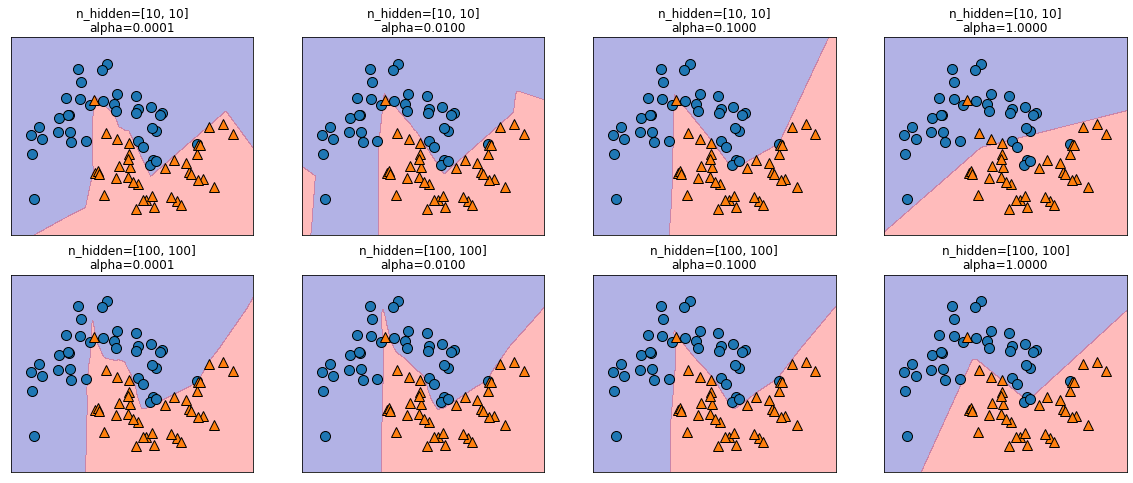

In [80]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                           alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

##### 重みの初期化は乱数？意図のない数字でいいのか．
これが学習されるモデルに影響を与えることは，ニューラルネットワークの重要な性質の一つと言える．当然乱数は出力に影響する．異なる乱数シードを用いれば，全く異なったモデルが得られる．ネットワークが大きくなり，複雑さを適切に設定すれば精度に大きな影響はないだろうが，小さいネットワークのニューラルネットワークを用いる際にはこのことに留意する必要がある．

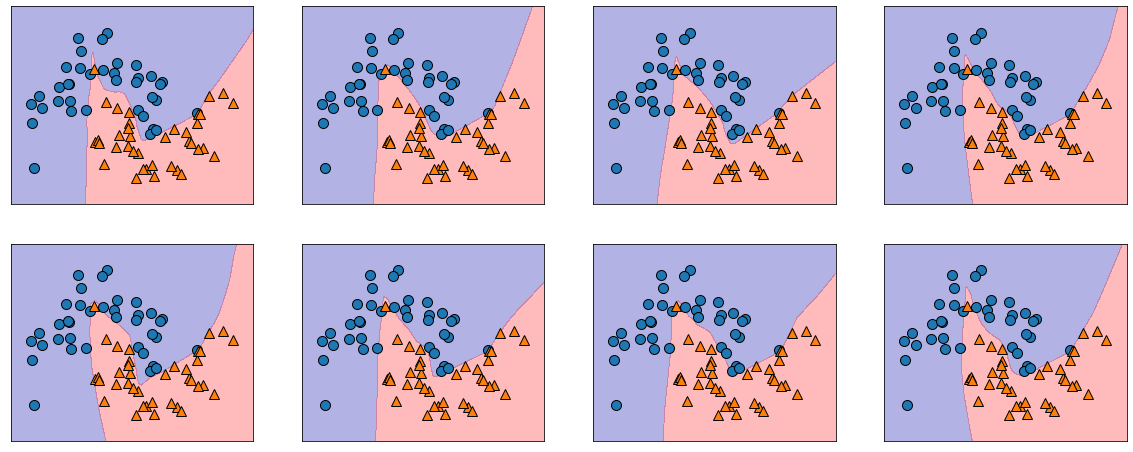

In [81]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [82]:
# 実データに対するニューラルネットワークを理解するために，cancerデータセットを使う
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [83]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


In [98]:
# 訓練セットの特徴量ごとの平均値を算出
mean_on_train = X_train.mean(axis=0)
# 訓練セットの特徴量ごとの標準偏差を算出
std_on_train = X_train.std(axis=0)

# 平均を引き，標準偏差の逆数でスケール変換する
# これでmean=0, std=1となる
X_train_scaled = (X_train - mean_on_train) / std_on_train
# まったく同じ変換（訓練データの平均と標準偏差を使って）をテストセットに渡す
X_test_scaled = (X_test - mean_on_train) / std_on_train

# fit model 
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


C:\Users\81804\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [99]:
# fit model 
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


##### 訓練性能とテスト性能に差があるといういことは，モデルの複雑さを下げれば，汎化性能が上がる可能性があることを意味している．

In [100]:
# fit model 
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


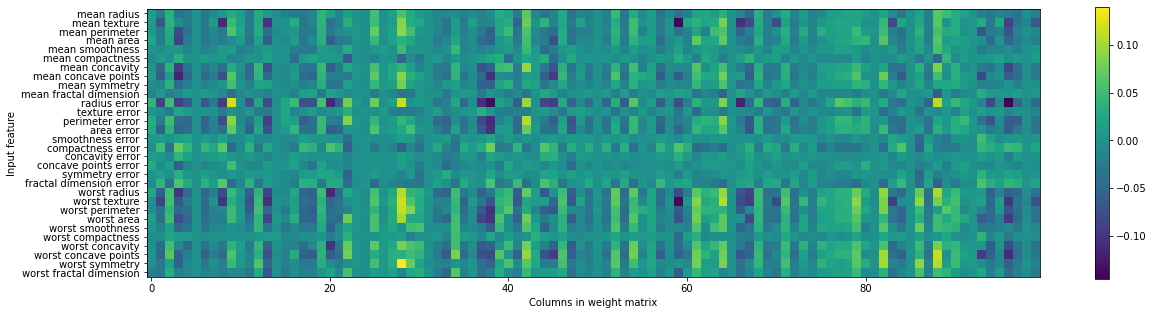

In [102]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

#### 2.3.8.3 長所，短所，パラメータ

ニューラルネットワークは，機械学習の多くのアプリケーションにおいて，最先端のモデルとして蘇った．
##### 最大の利点
大量のデータに含まれているデータを費やし，信じられないほど複雑なモデルを構築できること．
##### 欠点
とりわけ大きく，強力なものは訓練に時間がかかる．ニューラルネットワークのパラメータのチューニングはそれ自体が一つの技芸とされるほどの難易度がある．
##### ニューラルネットワークの複雑さ推定

##### メモ
fitはモデルをリセットする．何度使用してもそれらは毎回最初の一回目と同意である．

## 2.4 クラス分類器の不確実性推定

##### クラス分類器の不確実性推定に利用できる2つの関数
- decision_function
- predict_proba

In [104]:
# GradientBoostingClassifierはdecision_functionとpredict_probaの双方を実装
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# わかりやすいようにクラスを"blue"と"red"にする
y_named = np.array(["blue", "red"])[y]

# train_test_splitは任意の数の配列に適用できる
# すべての配列は整合するように分割される
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# 勾配ブースティングモデルを構築
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

### 2.4.1 決定関数（Decision Function）

In [108]:
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
# decisiton_functionの最初のいくつかを表示
# 決定関数の符号だけみれば予測クラスがわかる
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))

X_test.shape: (25, 2)
Decision function shape: (25,)
Decision function:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [109]:
print("Thresholded decision function:\n{}".format(gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [114]:
# True/Falseを0/1に
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# 0/1をclasses_のインデックスに使う
pred = gbrt.classes_[greater_zero]
print(gbrt.classes_)
# predはgbrt.predictの出力と同じになる
print("pred is equal to predictions: {}".format(np.all(pred == gbrt.predict(X_test))))

['blue' 'red']
pred is equal to predictions: True


In [117]:
decision_function = gbrt.decision_function(X_test)
decision_function
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


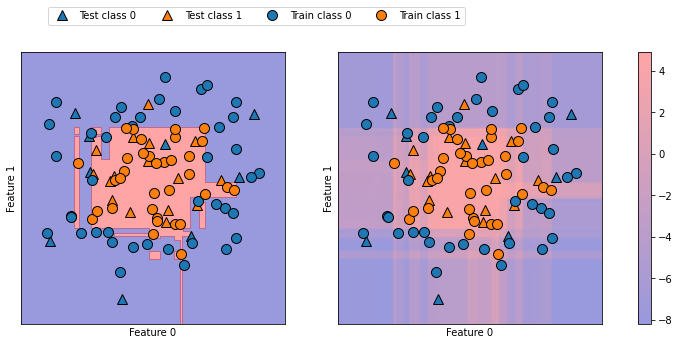

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # 訓練データポイントとテストデータポイントをプロット
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)    
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))

### 2.4.2 確率の予測

<code>predict_proba</code>の出力は，それぞれのクラスに属する確率で，<code>decision_function</code>の出力よりも理解しやすい．

In [122]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test[:6])))

Shape of probabilities: (25, 2)
Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


##### 較正されている（calibrated）
あるモデルが報告する確信度が，実際の正答率と一致している場合．

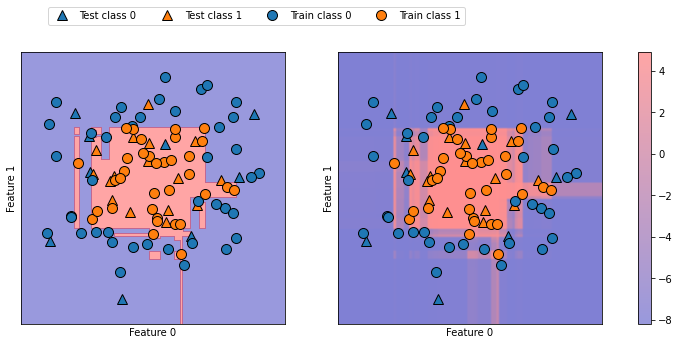

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores__image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # 訓練データポイントとテストデータポイントをプロット
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)    
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))

### 2.4.3 多クラス分類の不確実性

In [126]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)
# 決定関数配列の形状と決定関数をいくつか図示
print("Decision function shapa: {}".format(gbrt.decision_function(X_test).shape))
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))
print("=" * 120)
# 各データポイントに対して，各進度スコアが最大になるクラスを選ぶことで予測クラスを得る
print("Argmax of decision function:\n{}".format(np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))
# predict_probaの出力の形状はdecision_functionと同じ
# predict_probaの結果の最初の数行を表示
# 各行の和は1になる．確率のため
print("="*120)
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))
print("Sums: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))
print("Argmax of pridicted prpbabilities:\n{}".format(np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

logreg = LogisticRegression()

print("="*120)
# irisデータセットのクラス名で表示する
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique classes in training data: {}".format(logreg.classes_))
print("predictions: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function: {}".format(argmax_dec_func[:10]))
print("argmax combined with classes_: {}".format(logreg.classes_[argmax_dec_func][:10]))

Decision function shapa: (38, 3)
Decision function:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]
Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predicted probabilities:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Sums: [1. 1. 1. 1. 1. 1.]
Argmax of pridicted prpbabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
unique classes in training data: ['seto

## 2.5 まとめと展望

##### 大切なこと
モデルがおいている仮定やパラメータの意味を理解せずに，適当なデータセットに適当なアルゴリズムを適用するだけでは正確なモデルを得ることはできない．
##### 最近傍法
小さいデータに関しては，良いベースラインとなる．説明が容易．
##### 線形モデル
最初に試してみるべきアルゴリズム．非常に大きいデータセットに適する．非常に高次元のデータに適する．
##### ナイーブベイズ
クラス分類にしか使えない．線形モデルよりもさらに高速．非常に大きいデータセット，高次元データに適する．線形も出うるより精度が劣ることが多い．
##### 決定木
非常に高速．データのスケールを考慮する必要がない．可視化が可能で説明しやすい．
##### ランダムフォレスト
ほとんどの場合単一の決定木よりも高速で，頑健で，強力．データのスケールを考慮する必要がほとんどない．高次元で疎なデータには適さない．
##### 勾配ブースティング決定木
多くの場合，ランダムフォレストよりも少し精度が高い．ランダムフォレストよりも訓練時に時間がかかるが，予測はこちらの方が速く，メモリ使用量も小さい．ランダムフォレストよりもパラメータに敏感．
##### サポートベクタマシン
同じような意味を持つ特徴量からなる中規模なデータセットに対しては強力．データのスケールを調整する必要がある．パラメータに敏感．

##### ニューラルネットワーク
非常に複雑なモデルを構築できる．特に大きなデータセットに有効．データのスケールを調整する必要がある．パラメータに敏感．大きいモデルは訓練に時間がかかる．